In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the CSV file 
data = pd.read_csv(r"C:\Users\User\Downloads\accident data.csv")

In [6]:
# Creatimg DataFrame from the loaded data
df = pd.DataFrame(data)

# Displaying the first few rows of the DataFrame
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [7]:
# Summary statistics of numerical variables
print(df.describe())

            Latitude      Longitude  Number_of_Casualties  Number_of_Vehicles
count  660654.000000  660653.000000         660679.000000       660679.000000
mean       52.553866      -1.431210              1.357040            1.831255
std         1.406922       1.383330              0.824847            0.715269
min        49.914430      -7.516225              1.000000            1.000000
25%        51.490690      -2.332291              1.000000            1.000000
50%        52.315641      -1.411667              1.000000            2.000000
75%        53.453452      -0.232869              1.000000            2.000000
max        60.757544       1.762010             68.000000           32.000000


In [8]:
# Count of unique values in each column
print(df.nunique())

Index                      421020
Accident_Severity               3
Accident Date                1461
Latitude                   511618
Light_Conditions                5
District Area                 422
Longitude                  529766
Number_of_Casualties           36
Number_of_Vehicles             19
Road_Surface_Conditions         5
Road_Type                       5
Urban_or_Rural_Area             3
Weather_Conditions              8
Vehicle_Type                   16
dtype: int64


In [9]:
# Information about DataFrame including data types and non-null values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [10]:
# Check for missing values
data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [12]:

# Imputing missing values in the 'Road_Type' column with the mode
data['Road_Type'].fillna(data['Road_Type'].mode()[0], inplace=True)

# Impute missing values for 'Road_Surface_Conditions' with mode
data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0])

0                  Dry
1          Wet or damp
2                  Dry
3                  Dry
4                  Dry
              ...     
660674             Dry
660675    Frost or ice
660676    Frost or ice
660677     Wet or damp
660678     Wet or damp
Name: Road_Surface_Conditions, Length: 660679, dtype: object

In [13]:
#Manually impute missing values 
data.loc[data['Weather_Conditions'].isnull(), 'Weather_Conditions'] = 'Clear'  

In [14]:
# Dropping rows with missing values for 'Longitude', 'Latitude', and 'Urban_or_Rural_Area' 
# since the missing values are relatively few and filling them may not be meaningful or accurate

data.dropna(subset=['Longitude', 'Latitude', 'Urban_or_Rural_Area'], inplace=True)

In [15]:
df1 = df.head()
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Clear,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Clear,Other vehicle


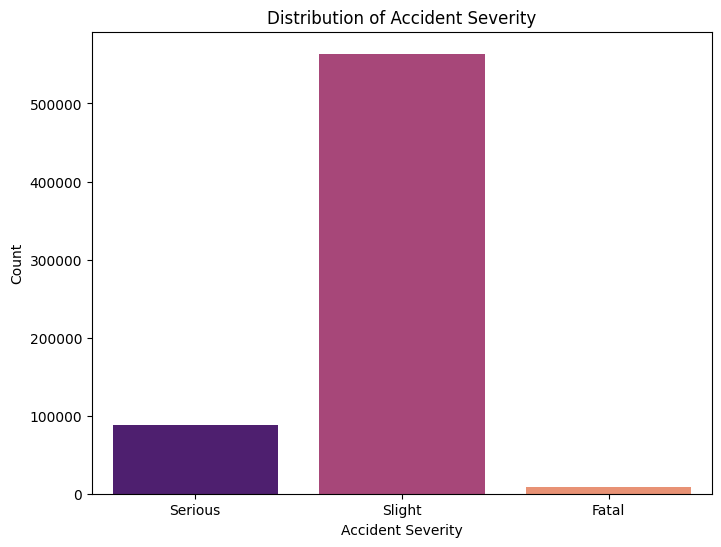

In [47]:
# Visualizing accident severity distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_Severity', data=data,hue='Accident_Severity', palette='magma')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

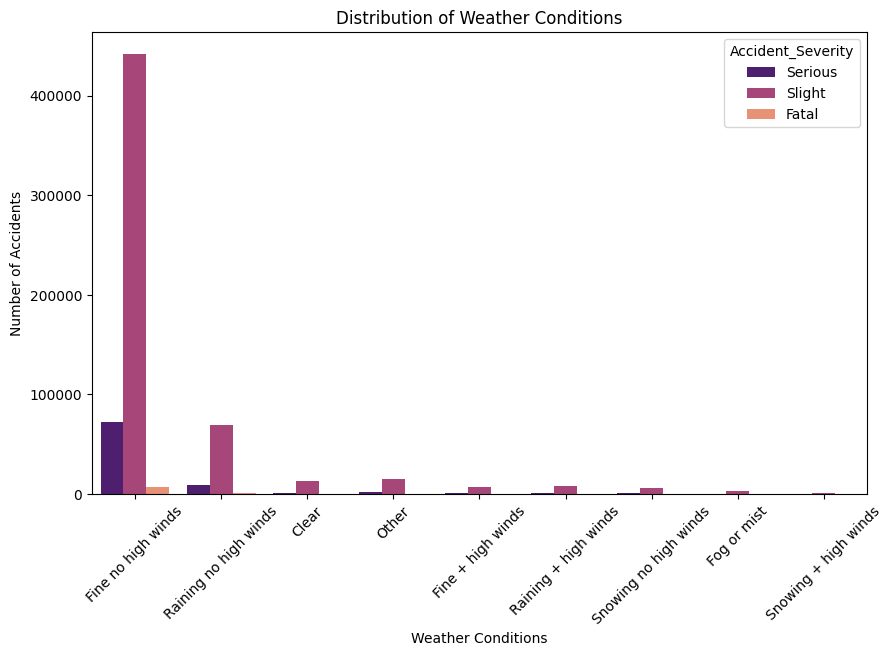

In [46]:
# Analyzing patterns related to weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weather_Conditions',hue='Accident_Severity',palette='magma')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


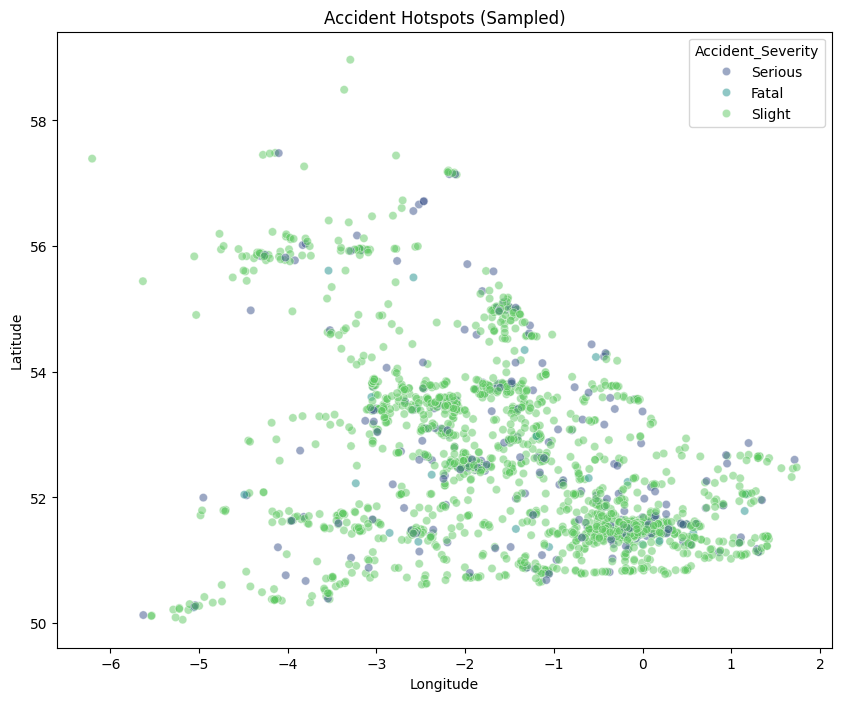

In [32]:
# Taking a random sample of the data
sample_size = 2000 
sampled_data = data.sample(n=sample_size, random_state=42)

# Visualizing accident hotspots using the sampled data
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sampled_data, x='Longitude', y='Latitude', hue='Accident_Severity', palette='viridis', alpha=0.5)
plt.title('Accident Hotspots (Sampled)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

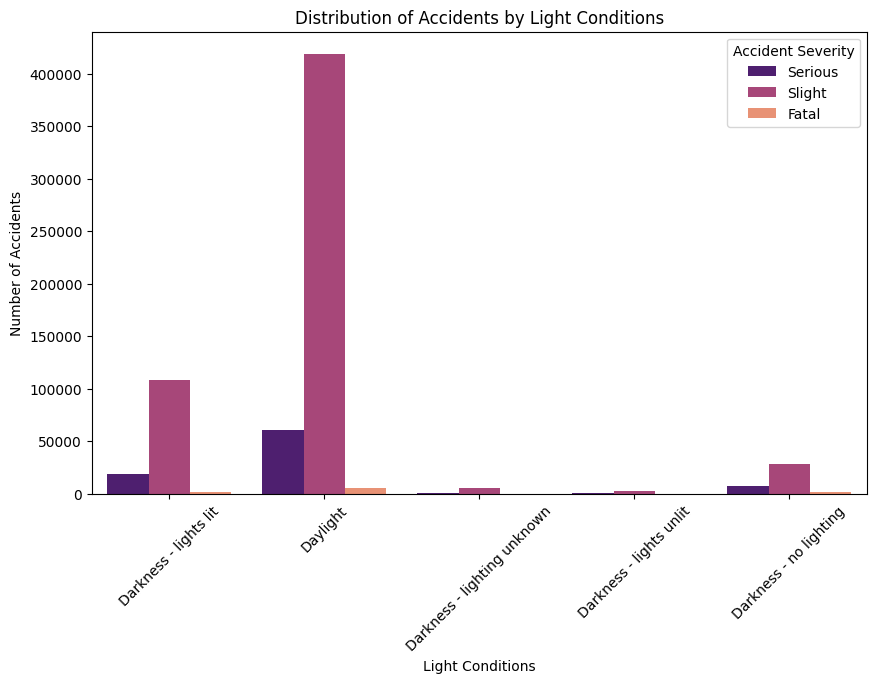

In [59]:
# Visualizing contributing factors 
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Light_Conditions', hue='Accident_Severity',palette='magma')
plt.title('Distribution of Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.show()

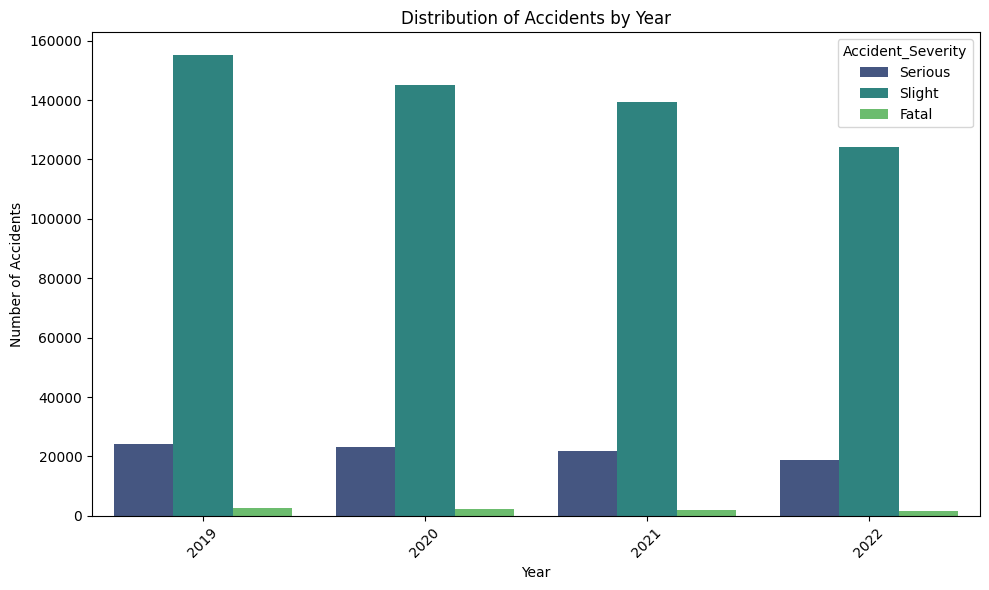

In [48]:
#Visualizing the distribution of accidents by year
data['Accident Date'] = pd.to_datetime(data['Accident Date'], format='%d-%m-%Y')

# Extract year from the accident date
data['Year'] = data['Accident Date'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Year',hue='Accident_Severity', palette='viridis')
plt.title('Distribution of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

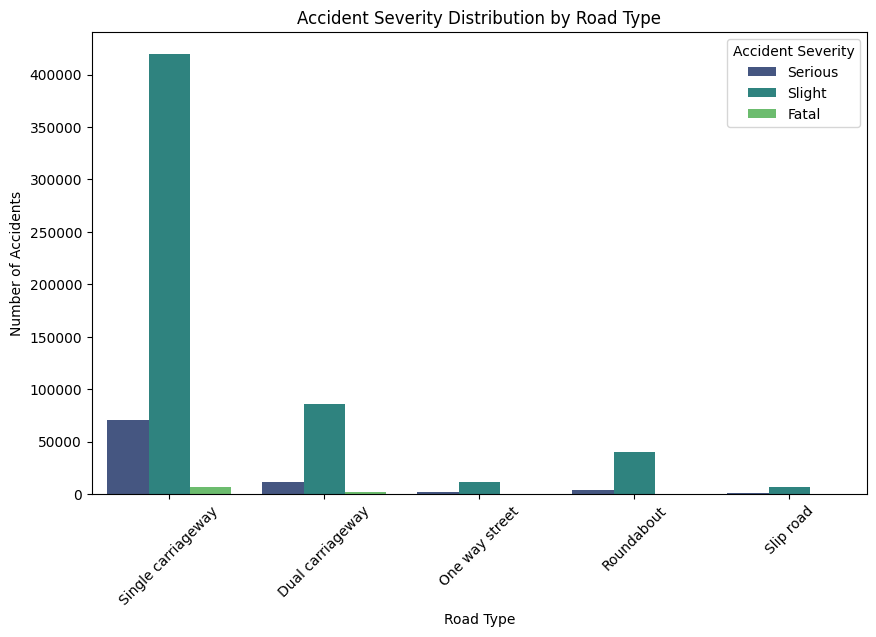

In [35]:
# Accident Severity Distribution by Road Type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Road_Type', hue='Accident_Severity', palette='viridis')
plt.title('Accident Severity Distribution by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.show()


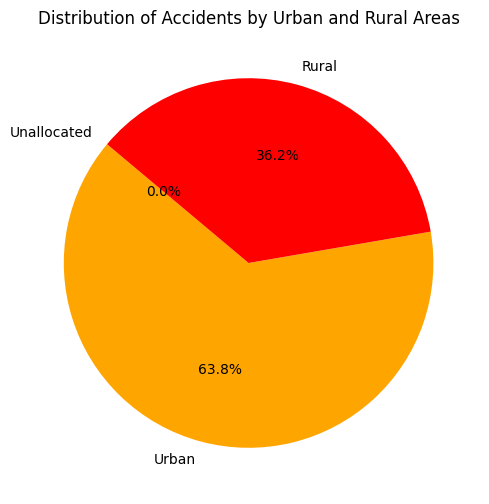

In [60]:
#visualizing the distribution of accidents by urban and rural areas.
urban_rural_counts = data['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(urban_rural_counts, labels=urban_rural_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'red'])
plt.title('Distribution of Accidents by Urban and Rural Areas')
plt.axis() 
plt.show()

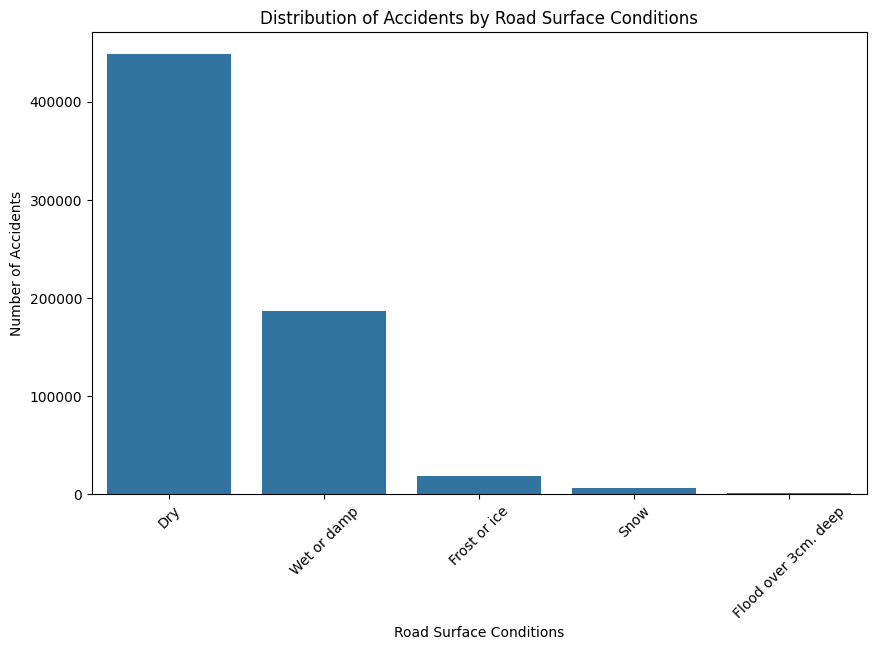

In [62]:
road_surface_counts = data['Road_Surface_Conditions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=road_surface_counts.index, y=road_surface_counts.values)
plt.title('Distribution of Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

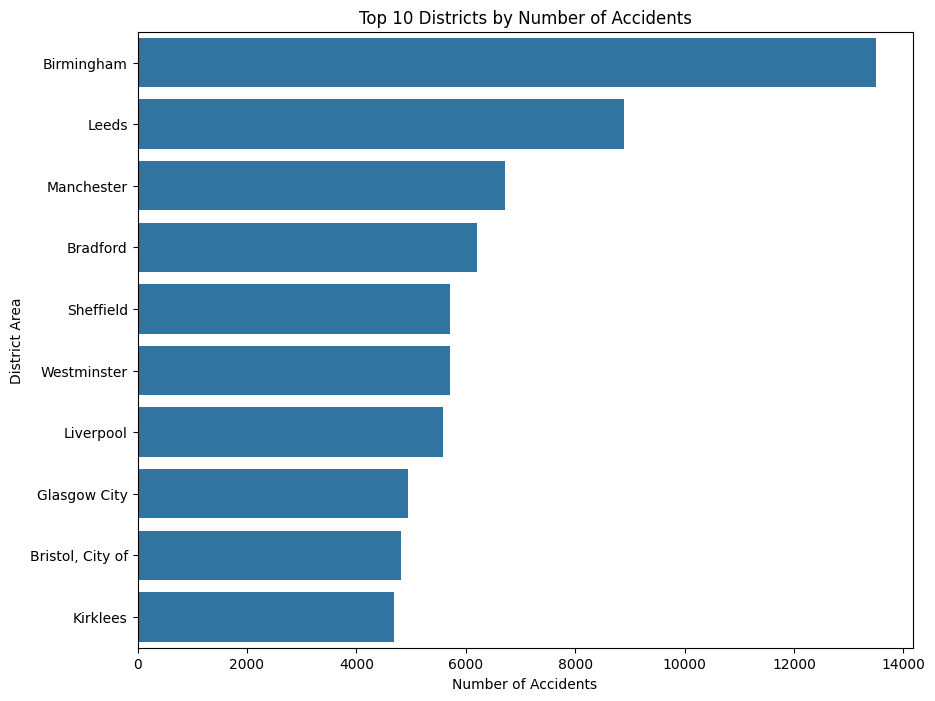

In [61]:
# Visualizing top 10 Districts by Number of Accidents
top_n = 10
district_counts = data['District Area'].value_counts().sort_values(ascending=False)
top_districts = district_counts.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_districts.values, y=top_districts.index)
plt.title(f'Top {top_n} Districts by Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('District Area')
plt.show()

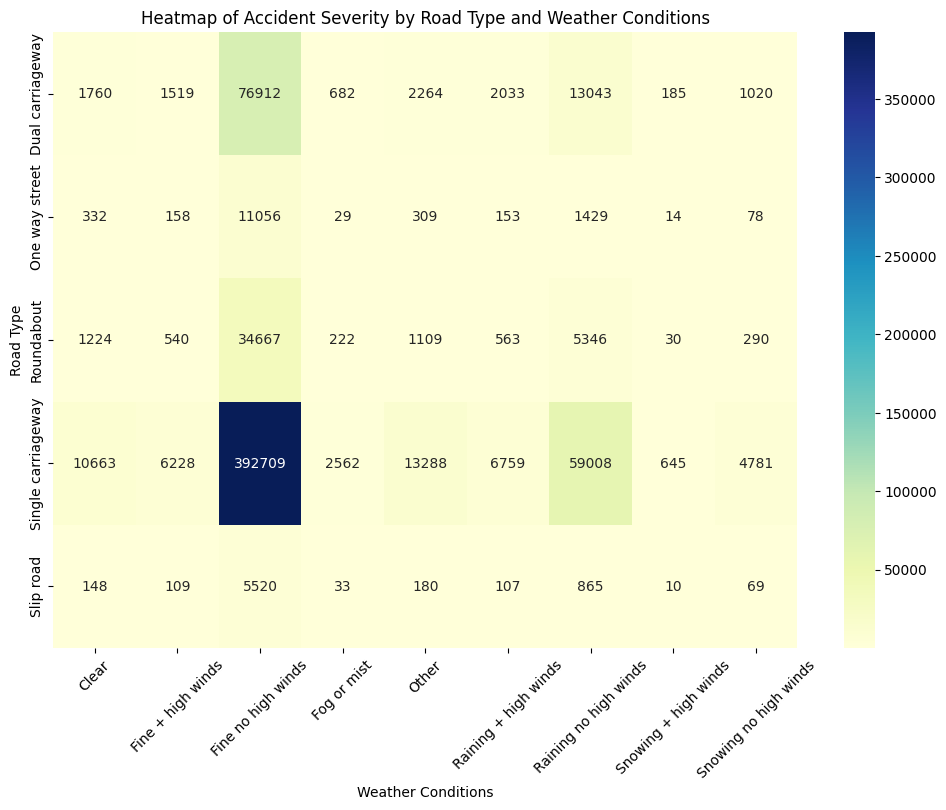

In [39]:
#visualizing the count of accidents categorized by road type and weather conditions.
heatmap_data = data.pivot_table(index='Road_Type', columns='Weather_Conditions', values='Accident_Severity', aggfunc='count')


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Accident Severity by Road Type and Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Road Type')
plt.xticks(rotation=45)
plt.show()